In [10]:
import coniii
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
import pandas as pd
import random
from scipy.stats import sem

In [5]:
stimuli = [0,1,2,3,4,5,6]
networks = []
for s in stimuli:
    with open(f'../../../../data/processed_data/nike/ising_parameters_stim_{s}.pickle','rb') as f:
        data =  pickle.load(f)
        networks.append(data)
    

In [17]:
networks[5]['h'].shape

(10, 131)

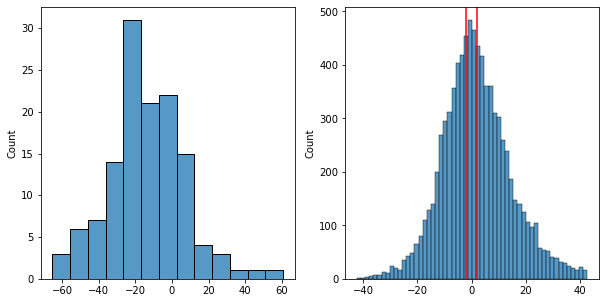

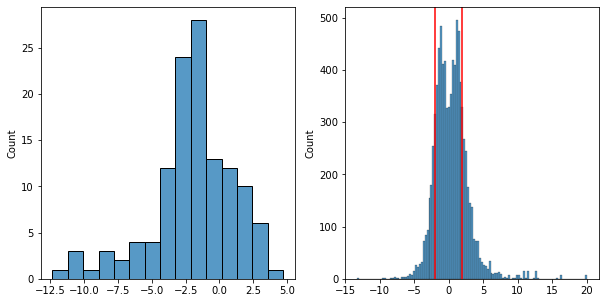

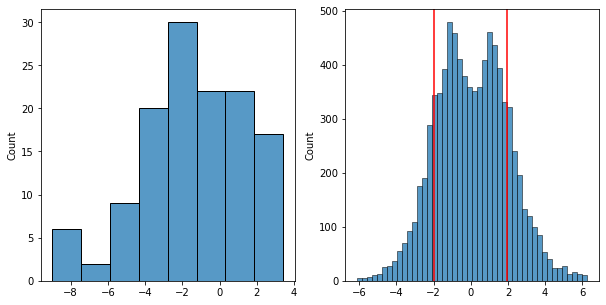

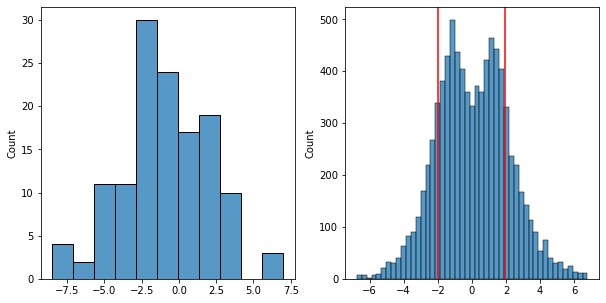

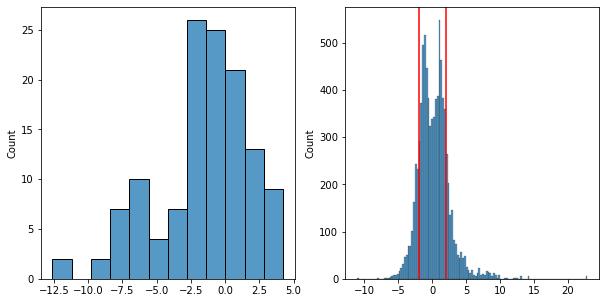

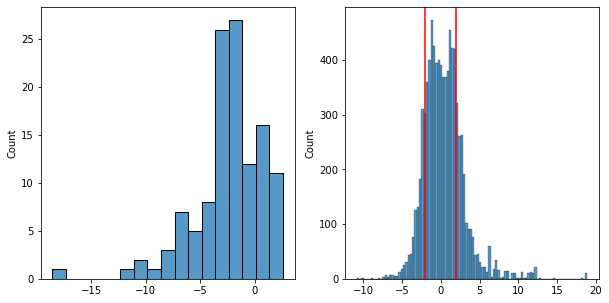

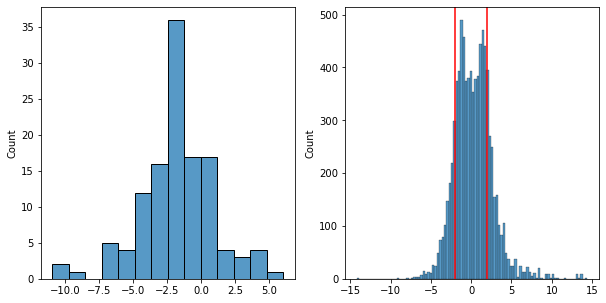

In [32]:
hs = []
delta_hs = []
tval_hs = []
Js = []
delta_Js = []
tval_Js = []

for i,net in enumerate(networks):

    h = np.mean(net['h'],axis=0)
    delta_h = sem(net['h'],axis=0)
    t_vals_h = h/delta_h

    #prune outliers
    th = 3*np.nanstd(t_vals_h)
    t_vals_h[abs(t_vals_h)>th]=np.nan

    hs.append(h)
    delta_hs.append(delta_h)
    tval_hs.append(t_vals_h)

    J = np.mean(net['J'],axis=0)
    delta_J = sem(net['J'],axis=0)
    t_vals_J = J/delta_J

    #prune outliers
    th = 3*np.nanstd(t_vals_J)
    t_vals_J[abs(t_vals_J)>th]=np.nan

    Js.append(J)
    delta_Js.append(delta_J)
    tval_Js.append(t_vals_J)


    plt.figure(figsize=(10,5))
    plt.title("Network {s}")
    plt.subplot(1,2,1)
    sns.histplot(t_vals_h)
    plt.subplot(1,2,2)
    sns.histplot(t_vals_J)
    plt.axvline(x=1.96,c='r')
    plt.axvline(x=-1.96,c='r')

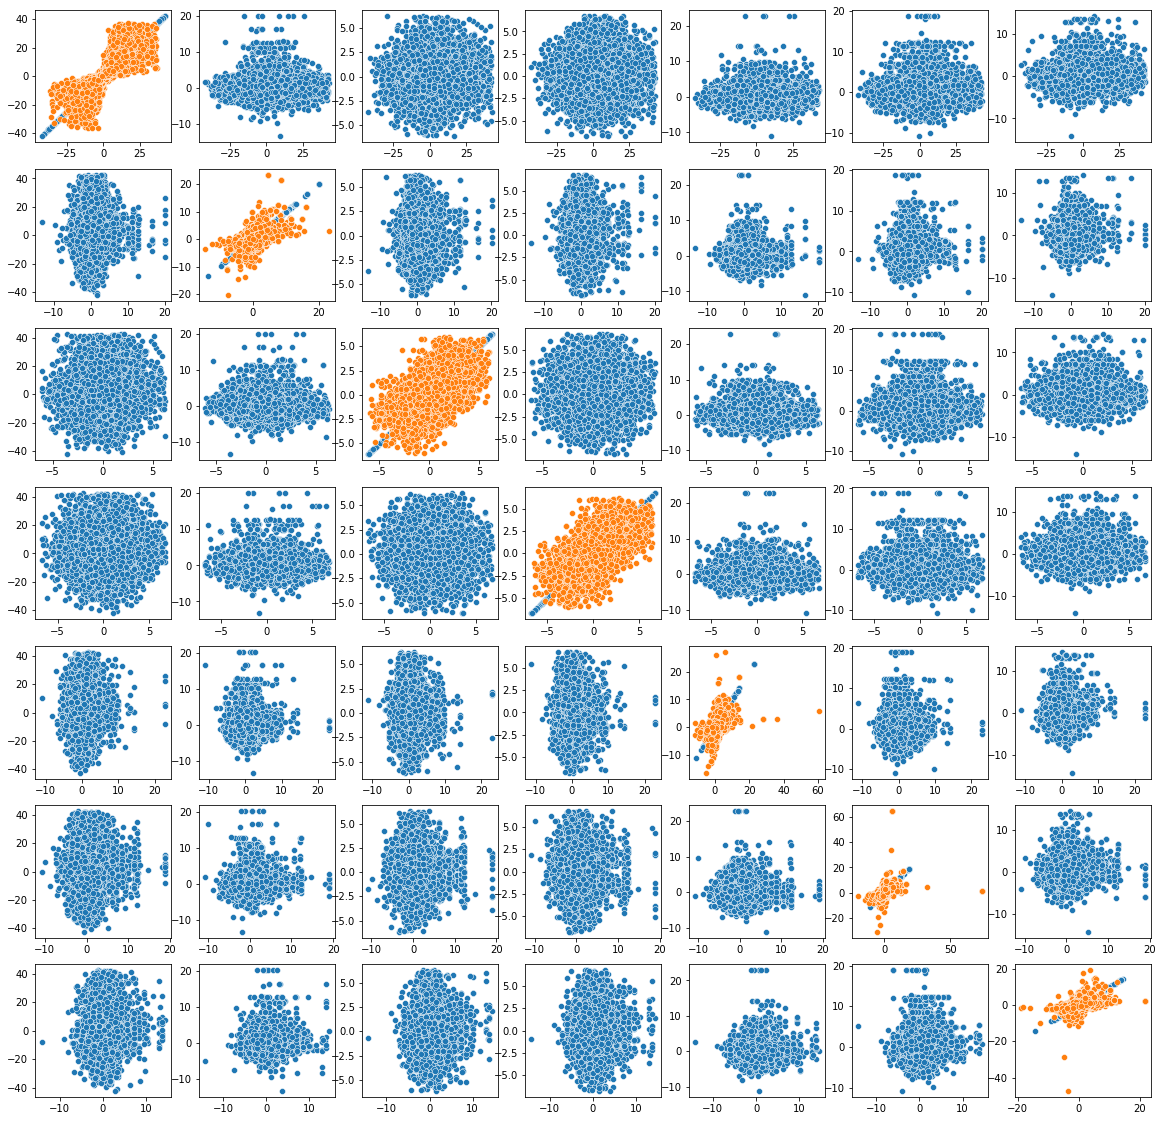

In [31]:
from itertools import product
n_rows = len(tval_Js)
n_cols = len(tval_Js)
plt.figure(figsize=(20,20))
for i,(a,b) in enumerate(product(tval_Js,tval_Js)):
    plt.subplot(n_rows,n_cols,i+1)
    sns.scatterplot(x=a,y=b)

# override diagonal with self variation
for i,net in enumerate(networks):

    J1 = np.mean(net['J'][:5],axis=0)
    delta_J1 = sem(net['J'][:5],axis=0)
    t_vals_J1 = J1/delta_J1

    #prune outliers
    th = 3*np.nanstd(t_vals_J1)
    t_vals_J1[abs(t_vals_J1)>th]=np.nan

    J2 = np.mean(net['J'][5:],axis=0)
    delta_J2 = sem(net['J'][5:],axis=0)
    t_vals_J2 = J2/delta_J2

    #prune outliers
    th = 3*np.nanstd(t_vals_J2)
    t_vals_J2[abs(t_vals_J2)>th]=np.nan

    plt.subplot(n_rows,n_cols,n_cols*i+i+1)
    sns.scatterplot(x=t_vals_J1,y=t_vals_J2)

    
